In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scikit_posthocs as sp

data_samco = pd.read_excel(
    r"C:/Users/arsinta/OneDrive/Documents/SAMCODIN JAN-NOV 2025.xlsx",
    header=1
)

print("PREVIEW DATA (RAW)")
display(data_samco.head())

print("\nMISSING VALUE PER KOLOM")
print(data_samco.isnull().sum())

PREVIEW DATA (RAW)


,Jenis Transaksi,Tujuan Penyaluran,Alamat Tujuan,Nama Kota/Kab Tujuan,Nama Provinsi TUjuan,Nama Zat Aktif,Nama Obat Jadi,Produsen Obat Jadi,Nama PBF,Provinsi,Kabupaten/Kota,No. Faktur,Tanggal Penyaluran,Batch,Jumlah,Satuan,Tanggal Kedaluwarsa,Keterangan
0,Dalam Negeri,"@RIS FARMA, APOTEK","JL. DHOHO NO. 24, KB. TULUNGAGUNG",tulungagung,JAWA TIMUR,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,ASTRO MEGA FARMA,Jawa Timur,Kota Surabaya,A0008022,2025-08-29,10420EE,2.0,"DUS, 10 STRIP @ 10 TABLET",2028-05-01 00:00:00,NaN
1,Dalam Negeri,16 APT.,DSN. PATAAN RT.004 RW.002 DS.PATAAN SAMBENG LA...,lamongan,JAWA TIMUR,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,DAYAANUGERAH DEWATASAKTI,Jawa Timur,Kab. Sidoarjo,07629/DAD/05/25,2025-05-30,10402EA,3.0,"DUS, 10 STRIP @ 10 TABLET",2028-01-01 00:00:00,NaN
2,Dalam Negeri,5 AKORDION APOTEK,"JL. AKORDION UTARA, RUKO PERMATA AKORDION KAV ...",kota malang,JAWA TIMUR,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,PIEROSCA TERANG SUKSES ABADI,Jawa Timur,Kota Surabaya,3250/0125,2025-01-16,10405DL,1.0,"DUS, 10 STRIP @ 10 TABLET",2027-10-01 00:00:00,NaN
3,Dalam Negeri,"5 AKORDION,APOTEK","Jl. Akordion Utara, Ruko Permata Akordion Kav. 5",kota malang,JAWA TIMUR,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,SURYA EKA PUTRA CABANG MALANG,Jawa Timur,Kab. Malang,PRM0845,2025-02-03,1041GDL,1.0,"DUS, 10 STRIP @ 10 TABLET",2027-10-01 00:00:00,NaN
4,Dalam Negeri,64 FARMA APOTEK,JL. KENONGO SARI NO.64 PEPELEGI - WARU,sidoarjo,JAWA TIMUR,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,BINA MITRA JAYA BERSAMA,Jawa Timur,Kab. Sidoarjo,BMJ01/01/FP/2504/BH00267,2025-04-28,_10415DL,3.0,"DUS, 10 STRIP @ 10 TABLET",2027-10-01 00:00:00,NaN



MISSING VALUE PER KOLOM
Jenis Transaksi             0
Tujuan Penyaluran           0
Alamat Tujuan               0
Nama Kota/Kab Tujuan        0
Nama Provinsi TUjuan        0
Nama Zat Aktif              0
Nama Obat Jadi              0
Produsen Obat Jadi          0
Nama PBF                    0
Provinsi                    0
Kabupaten/Kota              0
No. Faktur                  0
Tanggal Penyaluran          0
Batch                       0
Jumlah                      0
Satuan                      0
Tanggal Kedaluwarsa         0
Keterangan              11347
dtype: int64


In [2]:
data_samco = data_samco.drop_duplicates()

if "Keterangan" in data_samco.columns:
    data_samco = data_samco[~data_samco["Keterangan"].astype(str).str.contains("Transaksi Nihil", case=False, na=False)]

# rapikan nama kolom (strip)
data_samco.columns = [col.strip() for col in data_samco.columns]

In [3]:
prov_tujuan_col = "Nama Provinsi TUjuan"
prov_asal_col = "Provinsi"
jumlah_col = "Jumlah"
tgl_col = "Tanggal Penyaluran"

data_samco[prov_tujuan_col] = data_samco[prov_tujuan_col].astype(str).str.lower().str.strip()
data_samco[prov_asal_col]   = data_samco[prov_asal_col].astype(str).str.lower().str.strip()

# normalisasi typo yang umum
data_samco[prov_tujuan_col] = data_samco[prov_tujuan_col].replace({
    "jawaa timur": "jawa timur",
    "jawatimur": "jawa timur",
})

In [4]:
data_samco[jumlah_col] = pd.to_numeric(data_samco[jumlah_col], errors="coerce")
data_samco = data_samco[data_samco[jumlah_col].notna()]
data_samco = data_samco[data_samco[jumlah_col] > 0]

# bulatkan jumlah ke integer jika memang harus integer (opsional)
data_samco[jumlah_col] = data_samco[jumlah_col].astype(float).round().astype(int)

# parsing tanggal (untuk kelengkapan, meski uji tidak pakai tanggal langsung)
data_samco[tgl_col] = pd.to_datetime(data_samco[tgl_col], errors="coerce")

print("\nPREVIEW DATA SETELAH CLEANING")
display(data_samco.head())


PREVIEW DATA SETELAH CLEANING


,Jenis Transaksi,Tujuan Penyaluran,Alamat Tujuan,Nama Kota/Kab Tujuan,Nama Provinsi TUjuan,Nama Zat Aktif,Nama Obat Jadi,Produsen Obat Jadi,Nama PBF,Provinsi,Kabupaten/Kota,No. Faktur,Tanggal Penyaluran,Batch,Jumlah,Satuan,Tanggal Kedaluwarsa,Keterangan
0,Dalam Negeri,"@RIS FARMA, APOTEK","JL. DHOHO NO. 24, KB. TULUNGAGUNG",tulungagung,jawa timur,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,ASTRO MEGA FARMA,jawa timur,Kota Surabaya,A0008022,2025-08-29,10420EE,2,"DUS, 10 STRIP @ 10 TABLET",2028-05-01 00:00:00,NaN
1,Dalam Negeri,16 APT.,DSN. PATAAN RT.004 RW.002 DS.PATAAN SAMBENG LA...,lamongan,jawa timur,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,DAYAANUGERAH DEWATASAKTI,jawa timur,Kab. Sidoarjo,07629/DAD/05/25,2025-05-30,10402EA,3,"DUS, 10 STRIP @ 10 TABLET",2028-01-01 00:00:00,NaN
2,Dalam Negeri,5 AKORDION APOTEK,"JL. AKORDION UTARA, RUKO PERMATA AKORDION KAV ...",kota malang,jawa timur,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,PIEROSCA TERANG SUKSES ABADI,jawa timur,Kota Surabaya,3250/0125,2025-01-16,10405DL,1,"DUS, 10 STRIP @ 10 TABLET",2027-10-01 00:00:00,NaN
3,Dalam Negeri,"5 AKORDION,APOTEK","Jl. Akordion Utara, Ruko Permata Akordion Kav. 5",kota malang,jawa timur,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,SURYA EKA PUTRA CABANG MALANG,jawa timur,Kab. Malang,PRM0845,2025-02-03,1041GDL,1,"DUS, 10 STRIP @ 10 TABLET",2027-10-01 00:00:00,NaN
4,Dalam Negeri,64 FARMA APOTEK,JL. KENONGO SARI NO.64 PEPELEGI - WARU,sidoarjo,jawa timur,"CHLORPHENAMINE MALEATE , DEXTROMETHORPHAN HYDR...",SAMCODIN,SAMCO FARMA,BINA MITRA JAYA BERSAMA,jawa timur,Kab. Sidoarjo,BMJ01/01/FP/2504/BH00267,2025-04-28,_10415DL,3,"DUS, 10 STRIP @ 10 TABLET",2027-10-01 00:00:00,NaN



TOTAL PENYALURAN PER PROVINSI TUJUAN (SUM)


,Nama Provinsi TUjuan,Total Jumlah Obat
4,jawa timur,114639
2,jawa barat,7633
0,bali,6741
6,kalimantan selatan,4546
3,jawa tengah,1613
18,sulawesi selatan,847
17,riau,800
8,kalimantan timur,678
7,kalimantan tengah,439
15,papua selatan,424



FREKUENSI BARIS/TRANSAKSI PER PROVINSI TUJUAN
Nama Provinsi TUjuan
jawa timur             11306
bali                     319
jawa tengah              163
kalimantan selatan       119
nusa tenggara barat       50
jawa barat                43
kalimantan tengah         24
kalimantan timur          18
maluku                    16
nusa tenggara timur       16
papua selatan             15
sulawesi selatan          12
papua barat                8
di yogyakarta              6
kalimantan barat           5
Name: count, dtype: int64


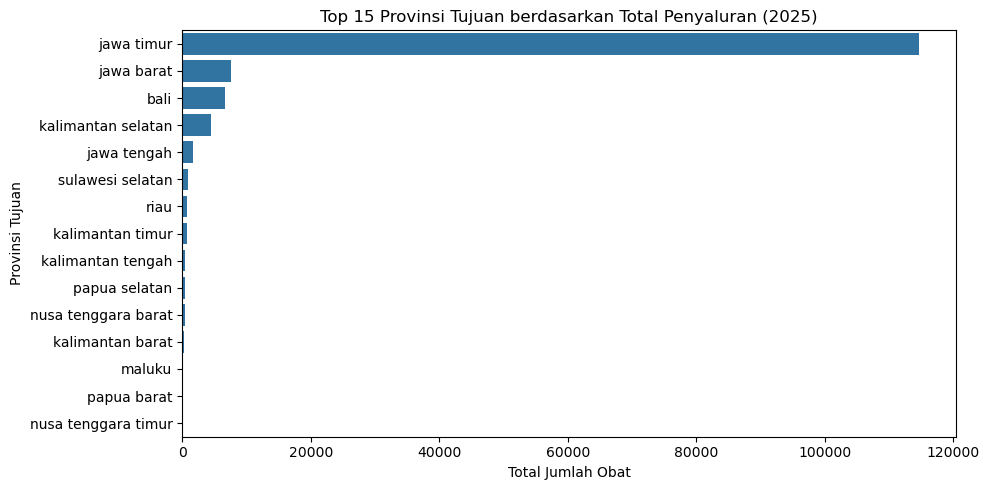

In [6]:
total_per_provinsi = (
    data_samco.groupby(prov_tujuan_col)[jumlah_col]
    .sum()
    .reset_index(name="Total Jumlah Obat")
    .sort_values("Total Jumlah Obat", ascending=False)
)

print("\nTOTAL PENYALURAN PER PROVINSI TUJUAN (SUM)")
display(total_per_provinsi)

print("\nFREKUENSI BARIS/TRANSAKSI PER PROVINSI TUJUAN")
print(data_samco[prov_tujuan_col].value_counts().head(15))

# (opsional) barplot total penyaluran
plt.figure(figsize=(10,5))
sns.barplot(data=total_per_provinsi.head(15), x="Total Jumlah Obat", y=prov_tujuan_col)
plt.title("Top 15 Provinsi Tujuan berdasarkan Total Penyaluran (2025)")
plt.xlabel("Total Jumlah Obat")
plt.ylabel("Provinsi Tujuan")
plt.tight_layout()
plt.show()

In [7]:
df_used = data_samco[[prov_tujuan_col, jumlah_col, tgl_col]].copy()

df_used[prov_tujuan_col] = df_used[prov_tujuan_col].str.upper().str.strip()
df_used[jumlah_col] = pd.to_numeric(df_used[jumlah_col], errors="coerce")

df_used = df_used.dropna(subset=[prov_tujuan_col, jumlah_col])

print("\nPREVIEW df_used (untuk uji statistik)")
display(df_used.head())



PREVIEW df_used (untuk uji statistik)


,Nama Provinsi TUjuan,Jumlah,Tanggal Penyaluran
0,JAWA TIMUR,2,2025-08-29
1,JAWA TIMUR,3,2025-05-30
2,JAWA TIMUR,1,2025-01-16
3,JAWA TIMUR,1,2025-02-03
4,JAWA TIMUR,3,2025-04-28


In [8]:
groups = [g[jumlah_col].values for _, g in df_used.groupby(prov_tujuan_col)]

stat, p_value = stats.kruskal(*groups)

print("\n===== UJI KRUSKAL-WALLIS =====")
print(f"Statistik H : {stat:.4f}")
print(f"p-value     : {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print("Kesimpulan: Ada perbedaan signifikan distribusi jumlah penyaluran antar provinsi (p < 0.05).")
else:
    print("Kesimpulan: Tidak ada perbedaan signifikan antar provinsi (p ≥ 0.05).")


===== UJI KRUSKAL-WALLIS =====
Statistik H : 353.5295
p-value     : 0.000000
Kesimpulan: Ada perbedaan signifikan distribusi jumlah penyaluran antar provinsi (p < 0.05).


Kesimpulan: Ada perbedaan signifikan distribusi jumlah penyaluran antar provinsi (p < 0.05).

===== POST HOC: DUNN TEST (Bonferroni) =====

Matriks p-value Dunn test (cuplikan):


,BALI,DI YOGYAKARTA,JAWA BARAT,JAWA TENGAH,JAWA TIMUR,KALIMANTAN BARAT,KALIMANTAN SELATAN,KALIMANTAN TENGAH
BALI,1.000000e+00,1.000000,5.536863e-03,6.142757e-02,1.691603e-01,0.475722,3.548094e-24,0.457578
DI YOGYAKARTA,1.000000e+00,1.000000,7.634568e-02,1.000000e+00,1.000000e+00,0.045106,3.083907e-04,0.184747
JAWA BARAT,5.536863e-03,0.076346,1.000000e+00,4.228288e-07,2.570361e-06,1.000000,1.000000e+00,1.000000
JAWA TENGAH,6.142757e-02,1.000000,4.228288e-07,1.000000e+00,1.000000e+00,0.031855,8.880543e-33,0.001167
JAWA TIMUR,1.691603e-01,1.000000,2.570361e-06,1.000000e+00,1.000000e+00,0.099783,4.490995e-45,0.009062
KALIMANTAN BARAT,4.757224e-01,0.045106,1.000000e+00,3.185475e-02,9.978325e-02,1.000000,1.000000e+00,1.000000
KALIMANTAN SELATAN,3.548094e-24,0.000308,1.000000e+00,8.880543e-33,4.490995e-45,1.000000,1.000000e+00,1.000000
KALIMANTAN TENGAH,4.575781e-01,0.184747,1.000000e+00,1.167459e-03,9.061528e-03,1.000000,1.000000e+00,1.000000



Pasangan provinsi dengan perbedaan signifikan (p < 0.05):


,Provinsi_1,Provinsi_2,p_value
124,JAWA TIMUR,KALIMANTAN SELATAN,4.490995e-45
86,KALIMANTAN SELATAN,JAWA TIMUR,4.490995e-45
66,KALIMANTAN SELATAN,JAWA TENGAH,8.880543e-33
123,JAWA TENGAH,KALIMANTAN SELATAN,8.880543e-33
120,BALI,KALIMANTAN SELATAN,3.548094e-24
6,KALIMANTAN SELATAN,BALI,3.548094e-24
226,KALIMANTAN SELATAN,NUSA TENGGARA BARAT,4.105972e-08
131,NUSA TENGGARA BARAT,KALIMANTAN SELATAN,4.105972e-08
43,JAWA TENGAH,JAWA BARAT,4.228288e-07
62,JAWA BARAT,JAWA TENGAH,4.228288e-07


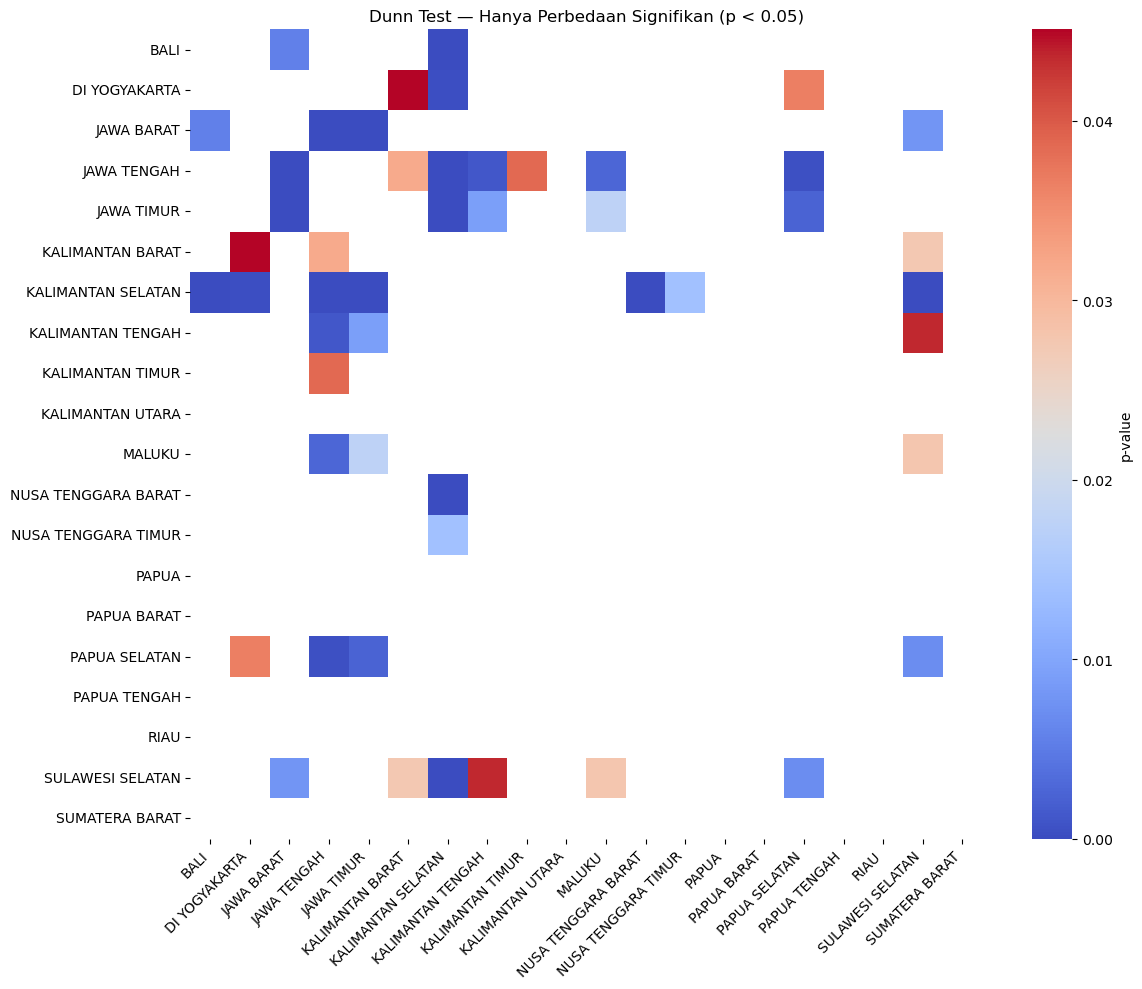

In [11]:
alpha = 0.05

if p_value < alpha:
    print("Kesimpulan: Ada perbedaan signifikan distribusi jumlah penyaluran antar provinsi (p < 0.05).")
    
    print("\n===== POST HOC: DUNN TEST (Bonferroni) =====")

    dunn_pvals = sp.posthoc_dunn(
        df_used,
        val_col=jumlah_col,
        group_col=prov_tujuan_col,
        p_adjust="bonferroni"
    )

    print("\nMatriks p-value Dunn test (cuplikan):")
    display(dunn_pvals.iloc[:8, :8])

    dunn_long = (
        dunn_pvals
        .reset_index()
        .melt(id_vars="index")
        .rename(columns={
            "index": "Provinsi_1",
            "variable": "Provinsi_2",
            "value": "p_value"
        })
    )

    dunn_sig = dunn_long[
        (dunn_long["Provinsi_1"] != dunn_long["Provinsi_2"]) &
        (dunn_long["p_value"] < alpha)
    ].sort_values("p_value")

    print("\nPasangan provinsi dengan perbedaan signifikan (p < 0.05):")
    display(dunn_sig.head(30))

    # Heatmap hanya p-value signifikan
    sig_mask = dunn_pvals >= alpha

    plt.figure(figsize=(12,10))
    sns.heatmap(
        dunn_pvals,
        mask=sig_mask,
        cmap="coolwarm",
        cbar_kws={"label": "p-value"}
    )
    plt.title("Dunn Test — Hanya Perbedaan Signifikan (p < 0.05)")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Kesimpulan: Tidak ada perbedaan signifikan antar provinsi (p ≥ 0.05).")
    print("Post hoc Dunn test tidak dilakukan.")
